In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
import scipy.stats as stats
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt


%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 999)

In [3]:
#imported both data sets

In [4]:
train = pd.read_csv('../datasets/train_clean.csv')

In [5]:
test = pd.read_csv('../datasets/test_clean.csv')

In [6]:
#created dummy variables for qualitative variables
tmp_train_dum = pd.get_dummies(train, columns =['bsmt_qual','exter_qual','kitchen_qual'],drop_first=True)
tmp_test_dum = pd.get_dummies(test, columns =['bsmt_qual','exter_qual','kitchen_qual'],drop_first=True)

In [7]:
train = tmp_train_dum
test = tmp_test_dum

In [8]:
#created features based on qualitative and square footage based variables
features =['bsmt_qual_Fa', 'bsmt_qual_Gd',
       'bsmt_qual_Po', 'bsmt_qual_TA', 'bsmt_qual_none', 'exter_qual_Fa',
       'exter_qual_Gd', 'exter_qual_TA', 'kitchen_qual_Fa', 'kitchen_qual_Gd',
       'kitchen_qual_TA','total_bsmt_sf','gr_liv_area','tot_outdoor_space']
X_train = train[features]
X_test = test[features]
y_train_overfit = train['saleprice']

In [9]:
#Create PolynomialFeatures

In [10]:
poly= PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

#instatiate a model

In [11]:
X_train_overfit = poly.fit_transform(X_train)
X_test_overfit = poly.fit_transform(X_test)

In [12]:
ss_overfit = StandardScaler()

In [13]:
lr=LinearRegression()

In [14]:
lr.fit(X_train_overfit, y_train_overfit)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
predictions = lr.predict(X_train_overfit)
train['predictions'] = predictions
residuals = train['saleprice'] - train['predictions']

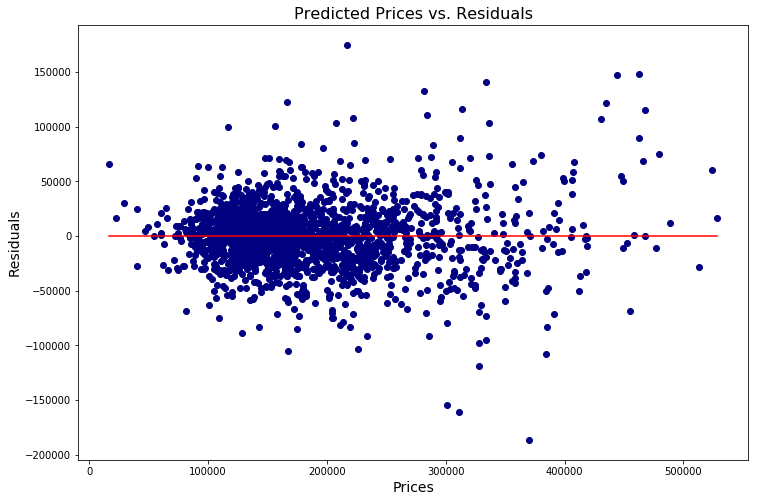

In [56]:
plt.figure(figsize = (12,8))
plt.scatter(train['predictions'],(residuals),c='navy');
plt.title('Predicted Prices vs. Residuals', size=16)
plt.xlabel('Prices', size=14)
plt.ylabel('Residuals', size=14);
plt.plot((np.min(train['predictions']), np.max(train['predictions'])),
         (np.mean(residuals), np.mean(residuals)),
         color='r');

In [17]:
r2_score(y_train_overfit, predictions)

0.8667970572670318

In [18]:
#create Ridge Model

In [19]:
ridge_mod = Ridge(alpha=10)

In [20]:
ridge_mod.fit(X_train_overfit, y_train_overfit)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [21]:
ridge_predictions = ridge_mod.predict(X_train_overfit)

In [22]:
r2_score(y_train_overfit, ridge_predictions)

0.8637486613087386

In [23]:
r_alph = np.logspace(0, 10, 200)

In [24]:
ridge_mod = RidgeCV(alphas=r_alph, scoring='r2', cv=5)

In [25]:
ridge_mod = ridge_mod.fit(X_train_overfit, y_train_overfit)

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=6.26465e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.01968e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.21068e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.16547e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.85784e-17): result may not be accurate.
  overwrite_a=Tru

In [26]:
ridge_mod.alpha_

16.070528182616393

In [27]:
y_train_ridge_pred = ridge_mod.predict(X_train_overfit)
y_test_ridge_pred = ridge_mod.predict(X_test_overfit)

In [28]:
predictions = y_train_ridge_pred
train['predictions'] = predictions
residuals = train['saleprice'] - train['predictions']

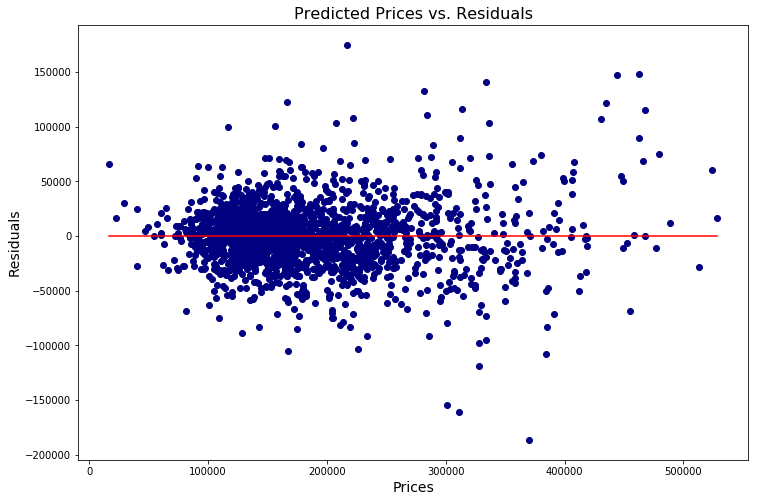

In [57]:
plt.figure(figsize = (12,8))
plt.scatter(train['predictions'],(residuals),c='navy');
plt.title('Predicted Prices vs. Residuals', size=16)
plt.xlabel('Prices', size=14)
plt.ylabel('Residuals', size=14);
plt.plot((np.min(train['predictions']), np.max(train['predictions'])),
         (np.mean(residuals), np.mean(residuals)),
         color='r');

In [30]:
r2_score(y_train_overfit, y_train_ridge_pred)

0.863064920960635

In [31]:
#create Lasso model

In [32]:
las_alph = np.logspace(-3, 0, 100)

In [33]:
las_mod = LassoCV(alphas=las_alph, cv=5)

In [34]:
las_mod = las_mod.fit(X_train_overfit, y_train_overfit)

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

In [37]:
# Generate predictions
y_train_las_pred = las_mod.predict(X_train_overfit)
y_test_las_pred = las_mod.predict(X_test_overfit)

# Evaluate model.
print(r2_score(y_train_overfit, y_train_las_pred))

0.8667585797594832


In [38]:
predictions = y_train_las_pred
train['predictions'] = predictions
residuals = train['saleprice'] - train['predictions']

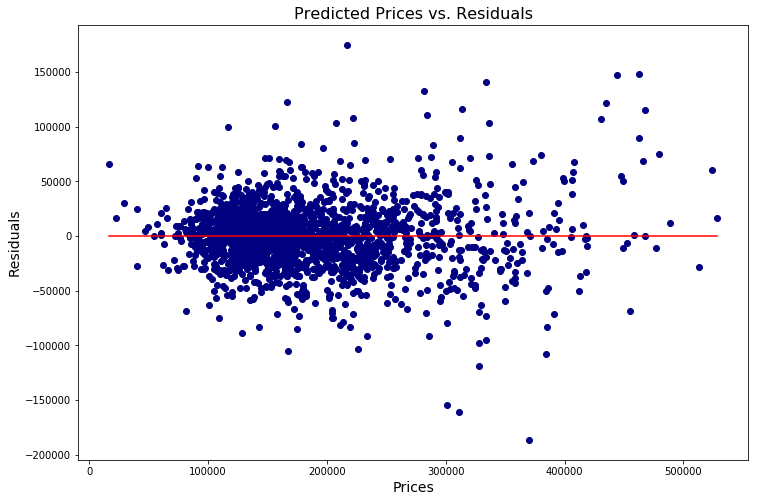

In [58]:
plt.figure(figsize = (12,8))
plt.scatter(train['predictions'],(residuals),c='navy');
plt.title('Predicted Prices vs. Residuals', size=16)
plt.xlabel('Prices', size=14)
plt.ylabel('Residuals', size=14);
plt.plot((np.min(train['predictions']), np.max(train['predictions'])),
         (np.mean(residuals), np.mean(residuals)),
         color='r');

In [40]:
las_mod.alpha_

1.0

In [41]:
r2_score(y_train_overfit, y_train_ridge_pred)

0.863064920960635

In [42]:
ridge_mod.coef_

array([ 3.29992552e+03,  1.66418703e+03, -1.78320078e-02, -4.07090820e+02,
        1.25696169e+04,  8.59805307e+02, -4.97178220e+03,  6.71261011e+03,
        3.88263313e+03, -2.76437024e+03,  6.65820916e+03,  1.67295651e+02,
        1.69762804e+02, -1.02496671e+02,  3.29992552e+03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.09429085e+03,
       -2.85858366e+03,  4.06421833e+03,  6.40420536e+03, -3.04060413e+03,
        2.31991203e+03, -4.66110884e+01, -2.28053576e+01,  6.68203613e+01,
        1.66418703e+03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        5.25280438e+00, -5.05299204e+01,  4.53402837e+03, -1.26378341e+03,
       -3.83409617e+03,  6.18685812e+03, -5.69502836e+00, -1.60340597e+01,
        5.85118061e+00, -1.78320079e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.78320078e-02,  0.00000000e+00,
        0.00000000e+00, -1.78320078e-02, -3.08493736e+00, -2.42693627e+01,
       -2.19333697e+00, -

In [43]:
las_mod.coef_

array([-8.31680316e+04,  1.15359769e+05,  0.00000000e+00,  2.37418361e+04,
        6.54414600e+03, -5.33225443e+04,  3.19916651e+04, -2.20566491e+04,
        5.49218655e+03, -2.36716705e+04, -2.05941512e+04,  1.95723546e+02,
        1.91556229e+02, -8.42769856e+01,  1.23556674e+05,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -8.21422220e+03,  1.74096691e+04,  5.89508780e+04,  2.04797303e+04,
        3.23963118e+04, -7.96860505e+01, -4.31468762e+01,  9.26359985e+01,
       -4.46574182e+04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.02857238e+04,  0.00000000e+00,  8.74898995e+03, -7.22111250e+02,
       -7.56807896e+03, -2.64790460e+02, -2.94069298e+01, -3.13615910e+01,
        1.48690418e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  4.31430565e+00,
        0.00000000e+00,  

In [44]:
#created a new dataframe for me submission 

In [45]:
submission = pd.DataFrame(columns=[])

In [46]:
#assigned data to dataframe

In [47]:
#submission = pd.DataFrame(columns=[test['id']
submission['Id'] = test['id']
submission['SalePrice'] = y_test_ridge_pred

In [49]:
submission.to_csv('../submissions/submission_sixteen.csv',index=False)

In [50]:
submission['SalePrice'] = y_test_las_pred

In [52]:
submission.to_csv('../submissions/submission_seventeen.csv',index=False)